# 6.9. Ley de Hooke en coordenadas cilíndricas

|Quién | Fecha | Qué hizo |
| ---  | ---   | ---      |
|Diego Andrés Alvarez, <daalvarez@unal.edu.co>  | Marzo 22, 2023 | Código inicial |

In [1]:
from sympy import sin, cos, simplify, symbols, factor, Eq, init_printing, latex, Matrix, solve

# Para imprimir bonito
init_printing()
from IPython.display import Math                 
def imprimir (texto1, variable, texto2=""):
    return Math(texto1 +  rf'{latex(variable)}' + texto2)

Se define la matriz de transformación $\boldsymbol{T}$:

In [2]:
t = symbols('θ')

T = Matrix([[ cos(t), -sin(t),       0 ],     
            [ sin(t),  cos(t),       0 ],      
            [      0,       0,       1 ]])

Se definen los esfuerzos y deformaciones en coordenadas cilíndricas:

In [3]:
sr, st, sz, trt, trz, ttz = symbols("sigma_r,      sigma_θ,      sigma_z,      tau_rθ,   tau_rz,   tau_θz")
er, et, ez, grt, grz, gtz = symbols("varepsilon_r, varepsilon_θ, varepsilon_z, gamma_rθ, gamma_rz, gamma_θz")
ert = grt/2
erz = grz/2
etz = gtz/2

Se define el tensor de tensiones en coordenadas cilíndricas $\underline{\underline{\boldsymbol{\sigma}}}_{\text{cil}}$ con respecto a la base $\{\hat{\boldsymbol{r}}, \hat{\boldsymbol{\theta}}, \hat{\boldsymbol{z}}\}$:

In [4]:
sigma_cil = Matrix([[  sr, trt, trz ],
                    [ trt,  st, ttz ],                       
                    [ trz, ttz,  sz ]])

Se define el tensor de deformaciones en coordenadas cilíndricas $\underline{\underline{\boldsymbol{\varepsilon}}}_{\text{cil}}$ con respecto a la base $\{\hat{\boldsymbol{r}}, \hat{\boldsymbol{\theta}}, \hat{\boldsymbol{z}}\}$:

In [5]:
eps_cil = Matrix([[  er, ert, erz ],
                  [ ert,  et, etz ],                       
                  [ erz, etz,  ez ]])

Se calcula el tensor de tensiones $\underline{\underline{\boldsymbol{\sigma}}}_{\text{cil}}$ con respecto a la base $\{\hat{\boldsymbol{i}}, \hat{\boldsymbol{j}}, \hat{\boldsymbol{k}}\}$. Recuerde que $$\underline{\underline{\boldsymbol{\sigma}}} = \boldsymbol{T} \underline{\underline{\boldsymbol{\sigma}}}_{\text{cil}} \boldsymbol{T}^T.$$

In [6]:
sigma = T*sigma_cil*T.T

Se calcula el tensor de deformaciones $\underline{\underline{\boldsymbol{\varepsilon}}}$  con respecto a la base $\{\hat{\boldsymbol{i}}, \hat{\boldsymbol{j}}, \hat{\boldsymbol{k}}\}$. Recuerde que $$\underline{\underline{\boldsymbol{\varepsilon}}} = \boldsymbol{T} \underline{\underline{\boldsymbol{\varepsilon}}}_{\text{cil}} \boldsymbol{T}^T.$$

In [7]:
eps = T*eps_cil*T.T

Se extraen los términos de la matriz de tensiones $\underline{\underline{\boldsymbol{\sigma}}}$:

In [8]:
sx  = factor(sigma[0,0])
sy  = factor(sigma[1,1])
sz  = factor(sigma[2,2])
txy = factor(sigma[0,1])
txz = factor(sigma[0,2])
tyz = factor(sigma[1,2])

Se extraen los términos de la matriz de deformaciones $\underline{\underline{\boldsymbol{\varepsilon}}}$:

In [9]:
ex  =   eps[0,0]
ey  =   eps[1,1]
ez  =   eps[2,2]
gxy = 2*eps[0,1]
gxz = 2*eps[0,2]
gyz = 2*eps[1,2]

In [10]:
# Se define la ley de Hooke en coordenadas rectangulares:
# 
# E, G, nu = symbols('E, G, nu')
# 
# eq1 = ex  - (1/E)*(sx - nu*(sy + sz))
# eq2 = ey  - (1/E)*(sy - nu*(sx + sz))
# eq3 = ez  - (1/E)*(sz - nu*(sx + sy))
# eq4 = gxy - txy/G
# eq5 = gxz - txz/G
# eq6 = gyz - tyz/G
# 
# eq1 = eq1.expand().collect([sin(t)**2, cos(t)**2, sin(t)*cos(t)])
# eq2 = eq2.expand().collect([sin(t)**2, cos(t)**2, sin(t)*cos(t)])
# eq3 = eq3.simplify()
# eq4 = eq4.expand().collect([sin(t)**2, cos(t)**2, sin(t)*cos(t)])
# eq5 = eq5.expand().collect([sin(t), cos(t)])
# eq6 = eq6.expand().collect([sin(t), cos(t)])

In [11]:
# imprimir("", eq1, " = 0")
# Aquí sz se multiplica por (sin² t + cos² t) y en la expresión de grt se factorizan los términos para obtener G

In [12]:
# imprimir("", eq2, " = 0")
# Aquí sz se multiplica por (sin² t + cos² t) y en la expresión de grt se factorizan los términos para obtener G

In [13]:
# imprimir("", eq3, " = 0")

In [14]:
# imprimir("", eq4, " = 0")
# Al calcular a mano 2(er - et) se observa que el factor que acompaña a sin(t)*cos(t) se anula

In [15]:
# imprimir("", eq5, " = 0")

In [16]:
# imprimir("", eq6, " = 0")

Se define la ley de Hooke en coordenadas rectangulares:

In [17]:
E, G, nu = symbols('E, G, nu')

eq1 = Eq(ex,  (1/E)*(sx - nu*(sy + sz)))
eq2 = Eq(ey,  (1/E)*(sy - nu*(sx + sz)))
eq3 = Eq(ez,  (1/E)*(sz - nu*(sx + sy)))
eq4 = Eq(gxy, txy/G)
eq5 = Eq(gyz, txz/G)
eq6 = Eq(gxz, tyz/G)

Para despejar los términos comunes entre paréntesis de las ecuaciones anteriores basta evaluar las igualdades en $\sin(\theta)=0$ y $\cos(\theta)=1$, tal y como se ha hecho en los códigos anteriores:

In [18]:
eq1 = eq1.subs({sin(t): 0, cos(t): 1})
eq2 = eq2.subs({sin(t): 0, cos(t): 1})
eq3 = eq3.subs({sin(t): 0, cos(t): 1})
eq4 = eq4.subs({sin(t): 0, cos(t): 1})
eq5 = eq5.subs({sin(t): 0, cos(t): 1})
eq6 = eq6.subs({sin(t): 0, cos(t): 1})

In [19]:
eq1

In [20]:
eq2

In [21]:
eq3

In [22]:
eq4

In [23]:
eq5

In [24]:
eq6

Se despejan los esfuerzos para encontrar las ecuaciones de Lamé:

In [25]:
sol = solve([eq1, eq2, eq3, eq4, eq5, eq6], [sr, st, sz, trt, trz, ttz])

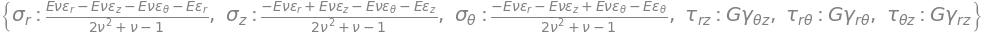

In [26]:
sol

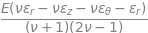

In [27]:
sol[sr].factor()